b'y=mx+c'
3.0
b'm:' 1.0
b'c:' 0.0
b'Actual values of Y' [ 12.25        22.32999992  33.11999893  44.66999817]
b'predicted values of Y' [ 12.25        22.32999992  33.11999893  44.66999817]
0.0


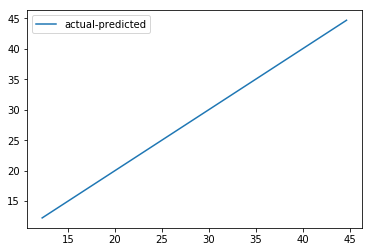

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

x=tf.constant([12.25,22.33,33.12,44.67],name='f')
y=tf.constant([12.25,22.33,33.12,44.67],name='s')
z=tf.constant(1.0)
e=tf.constant("y=mx+c")
ms=tf.constant("m:")
mc=tf.constant("c:")
ac=tf.constant("Actual values of Y")
pc=tf.constant("predicted values of Y")

# MEAN OF X, Y
mx = tf.reduce_mean(x)
my = tf.reduce_mean(y)

    
# X-MEAN , Y-MEAN
vx=tf.Variable(x-mx, name='varx')
vy=tf.Variable(y-my, name='vary')
l=tf.size(x)
a=tf.subtract(l,1)
a=tf.cast(a,tf.float32)
#VS=X-MEAN SQUARE, SUM OF VS
vs=tf.square(vx)
sn=tf.reduce_sum(vs)
sm=tf.div(sn,a)

    
#COVARIENCE  OF X,Y
cV=tf.multiply(vx,vy)
cm=tf.reduce_sum(cV)
cv=tf.div(cm,a)


#calculation of m and c
m=tf.divide(cv,sm)
c=my-(mx*m)

#Predicted values of Y
p=tf.multiply(x,m)
pry=tf.add(p,c)     


#calculating root-mean-square-error
rms=tf.sqrt(tf.reduce_mean(tf.squared_difference(y,pry)))
    
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
 
print(sess.run(e))
print(sess.run(a))
print(sess.run(ms),sess.run(m))
print(sess.run(mc),sess.run(c))

print(sess.run(ac),sess.run(y))
print(sess.run(pc),sess.run(pry))
print(sess.run(rms))

plt.plot(sess.run(y),sess.run(pry),label='actual-predicted')
plt.legend()
plt.show()

    